A Jupyter Widget

plots
did not filter
plotSentences


<IPython.core.display.Javascript object>


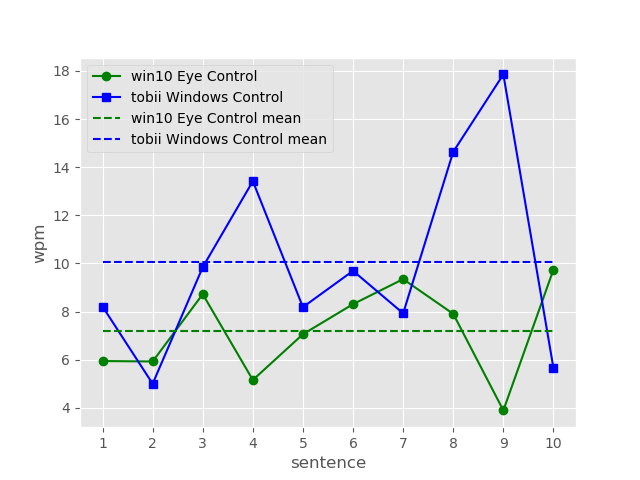

task
plots
did not filter
plotSentences


<IPython.core.display.Javascript object>


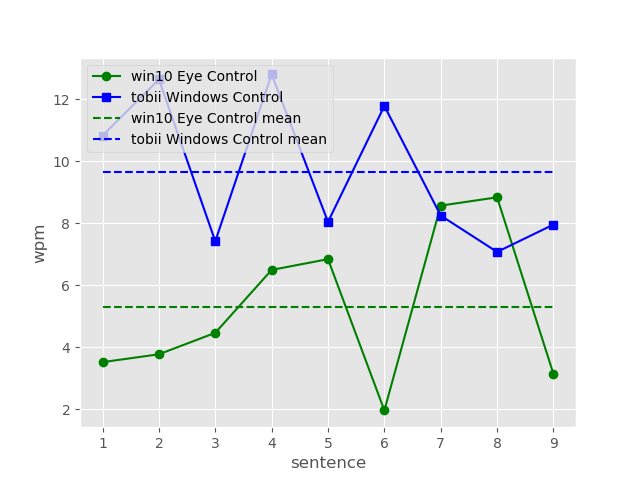

subject
plots
did not filter
plotSentences


C:\Users\jiyu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\jiyu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


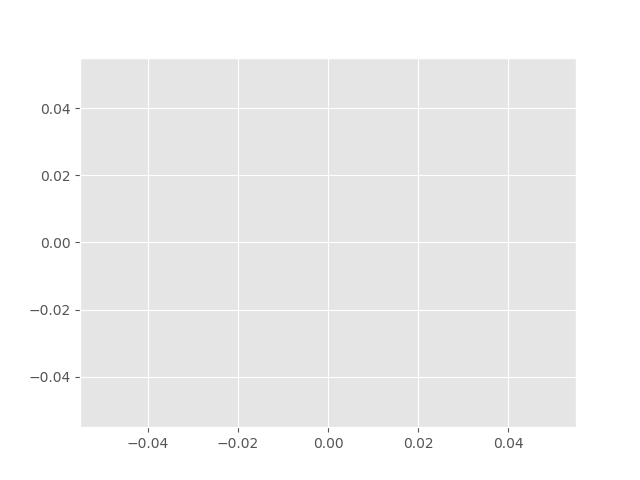

ValueError: min() arg is an empty sequence

In [67]:
%matplotlib notebook	
import csv
from __future__ import print_function
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import numpy as np


# create Sentence class
class Sentence:
	# class variable shared by all instances
	def __init__(self, subject, task, sentenceNo, testing):
		# instance variable unique to each instance
		self.subject = subject
		self.task = task			# 0: transcribe; 1: free conversation
		self.sentenceNo = sentenceNo
		self.testing = testing
		self.P = ""
		self.T = ""
		self.IS = ""
		self.wpm = 0.0
		self.totErrRate = 0.0
		self.keyboard = 0	# 0: win10 Eye Control; 1: tobii Win Control

def readSentences(argFilename, argSentences):
	with open('RawData/'+argFilename+'.csv') as csvDataFile:
		csvReader = csv.reader(csvDataFile)
		next(csvReader, None)
		next(csvReader, None)
		for row in csvReader:
			# write on keyboard clasification
			if 'Transcribe' in argFilename:
				argSentences.append(Sentence(int(argFilename[0]), 0, int(row[0]), int(row[1])))
			elif 'FreeConv' in argFilename:
				argSentences.append(Sentence(int(argFilename[0]), 1, int(row[0]), int(row[1])))
			# handle exceptions
			# if test subject didn't enter anything and skipped this sentence
			if int(row[2]) != 0:
				sentences[-1].wpm = int(row[4])+int(row[5])*0.1**(len(row[5]))
				sentences[-1].totErrRate = int(row[-14])*0.1**(len(row[-14]))
			else:
				sentences[-1].wpm = 0
				sentences[-1].totErrRate = 1
			if 'winEyeControl' in argFilename:
				sentences[-1].keyboard = 0
			elif 'tobiiWinControl' in argFilename:
				sentences[-1].keyboard = 1

def onChange_typePerf(b):
	if b['type'] == 'change' and b['name'] == 'value':
		print(contrTypePerf.value)

def onChange_task(change):
	if change['type'] == 'change' and change['name'] == 'value':
		print('task')
		plots()

def onChange_subject(change):
	if change['type'] == 'change' and change['name'] == 'value':
		print('subject')
		plots()

def delOutliers(argSentenceSet):
	print('did not filter')

# read from UI controls, prepare for plotting
def plots():
	print('plots')
	# read subject selection from UI control
	if contrSubject.value != 'All':
		argSubject = int(contrSubject.value[1])-1
		if contrTypePerf.value == 'Speed (wpm)':
			# print('wpm')
			if contrTask.value == 'Transcribe':
				argTask = 0
			elif contrTask.value == 'Free Conversation':
				argTask = 1
			sentenceKeybdA = [item for item in sentences if item.subject == argSubject and item.task == argTask and item.keyboard == 0]
			sentenceKeybdB = [item for item in sentences if item.subject == argSubject and item.task == argTask and item.keyboard == 1]			
			delOutliers(sentenceKeybdA)
			plotSentences(sentenceKeybdA, sentenceKeybdB)	
		elif contrTypePerf.value == 'Accuracy (totErrRate)':
			print('´totErrRate')
	else:
		argSubject = 'All'

# plot TypePerf of 2 keyboards against sentences, with variable variance visualization,
def plotSentences(argSentenceSet0, argSentenceSet1):
	print('plotSentences')
	# handle exceptions when wpm = 0, replace it with gradient
	x = [item.sentenceNo for item in argSentenceSet0]
	y0 = [item.wpm for item in argSentenceSet0]
	y1 = [item.wpm for item in argSentenceSet1]
	# plot average horizontal line
	average0 = np.mean(y0)
	average1 = np.mean(y1)
	fig, ax = plt.subplots()
	line0 = plt.plot(x, y0, 'go-', label='win10 Eye Control')
	line1 = plt.plot(x, y1, 'bs-', label='tobii Windows Control')
	line0_mean, = plt.plot([min(x), max(x)], [average0, average0], 'g--', label='win10 Eye Control mean')
	line1_mean = plt.plot([min(x), max(x)], [average1, average1], 'b--', label='tobii Windows Control mean')
	plt.legend(loc='upper left')
	ax.set(xlabel='sentence', ylabel='wpm', xticks=range(min(x), max(x)+1))


if __name__ == "__main__":
	# read data from .csv
	sentences = []
	readSentences('1Greta_s1Transcribe_winEyeControl', sentences)
	readSentences('1Greta_s2Transcibe_tobiiWinControl', sentences)
	readSentences('2Carlota_s1Transcribe_winEyeControl', sentences)
	readSentences('2Carlota_s2FreeConv_winEyeControl', sentences)
	readSentences('2Carlota_s3Transcribe_tobiiWinControl', sentences)
	readSentences('2Carlota_s4FreeConv_tobiiWinControl', sentences)
	readSentences('3Barbara_s1Transcribe_tobiiWinControl', sentences)
	readSentences('3Barbara_s2FreeConv_tobiiWinControl', sentences)
	readSentences('3Barbara_s3Transcribe_winEyeControl', sentences)
	readSentences('3Barbara_s4FreeConv_winEyeControl', sentences)

	# UI controls
	contrSubject = widgets.Select(
		options=['All', '#1', '#2', '#3'],
		value='#3',
		description='Test Subject:',
		disabled=False
		)
	contrTask = widgets.Select(
		options=['Transcribe', 'Free Conversation'],
		value='Transcribe',
		description='Task:',
		disabled=False
		)
	contrTypePerf = widgets.ToggleButtons(
		options=['Speed (wpm)', 'Accuracy (totErrRate)'],
		value='Speed (wpm)',
		description='Type performance',
		disabled=False,
		button_style=''
		)
	display(widgets.HBox([contrTypePerf, contrTask, contrSubject]))
	contrTypePerf.observe(onChange_typePerf)
	contrTask.observe(onChange_task)
	contrSubject.observe(onChange_subject)

	plots()

In [13]:
len(sentenceKeybdA)

NameError: name 'sentenceKeybdA' is not defined